In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras.engine import Model
import os
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
#load dataset 
_URL= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip=keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH=os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

In [0]:
#print the info of the dataset (how many images in each classes for training and validation)
train_dir=os.path.join(PATH, 'train')
validation_dir=os.path.join(PATH, 'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

num_cats_tr=len(os.listdir(train_cats_dir))
num_dogs_tr=len(os.listdir(train_dogs_dir))
total_train=num_cats_tr+num_dogs_tr

num_cats_val=len(os.listdir(validation_cats_dir))
num_dogs_val=len(os.listdir(validation_dogs_dir))
total_val=num_cats_val+num_dogs_val

In [4]:
#define the data generator and the hyper-params
batchsize=128
epochs=100
img_height=128
img_width=128

train_image_generator=ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
val_image_generator=ImageDataGenerator(rescale=1./255)

train_data_gen=train_image_generator.flow_from_directory(batch_size=batchsize, directory=train_dir, shuffle=True, target_size=(img_height, img_width), class_mode='binary')
val_data_gen=val_image_generator.flow_from_directory(batch_size=1000, directory=validation_dir, target_size=(img_height, img_width), class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
x_val, y_val=next(val_data_gen)


In [0]:
def ModelS():
    model=Sequential([
        Conv2D(8,3,padding='same', activation='relu',input_shape=(img_height,img_width,3)),
        MaxPooling2D(),
        Conv2D(16,3,padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(32,3,padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(256,activation='relu'),
        Dropout(0.2),
        Dense(1,activation='sigmoid')
        ])
    return model

In [0]:
#define and train a model with label smoothening
###label smoothening
def label_smoothening(y_true,y_pred):
   # alpha=0.2
   # y_true=(1-alpha)*y_true+alpha/2
    return tf.losses.binary_crossentropy(y_true, y_pred, label_smoothing=0.1)

In [8]:
#defnne the models and train 
#model_nls (train model without label smoothening)
#model_ls (train model with label smoothening)

model_nls=ModelS()
model_nls.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#training models 

history_nls=model_nls.fit_generator(train_data_gen, epochs=epochs, verbose=1, validation_data=(x_val,y_val))
train_acc_nls=history_nls.history['accuracy']
val_acc_nls=history_nls.history['val_accuracy']


Epoch 1/100
16/16 [==============================] - 12s 758ms/step - loss: 0.6979 - accuracy: 0.4925 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 11s 679ms/step - loss: 0.6898 - accuracy: 0.5405 - val_loss: 0.6811 - val_accuracy: 0.5090
Epoch 3/100
16/16 [==============================] - 11s 675ms/step - loss: 0.6818 - accuracy: 0.5590 - val_loss: 0.6657 - val_accuracy: 0.5790
Epoch 4/100
16/16 [==============================] - 11s 670ms/step - loss: 0.6871 - accuracy: 0.5390 - val_loss: 0.6707 - val_accuracy: 0.6380
Epoch 5/100
16/16 [==============================] - 11s 686ms/step - loss: 0.6730 - accuracy: 0.5960 - val_loss: 0.6482 - val_accuracy: 0.6150
Epoch 6/100
16/16 [==============================] - 11s 668ms/step - loss: 0.6474 - accuracy: 0.6210 - val_loss: 0.6265 - val_accuracy: 0.6340
Epoch 7/100
16/16 [==============================] - 11s 671ms/step - loss: 0.6234 - accuracy: 0.6565 - val_loss: 0.6124 - val_accuracy:

In [9]:


model_ls=ModelS()
model_ls.compile(optimizer='adam',loss=label_smoothening, metrics=['accuracy']) 
train_acc_ls=[]
val_acc_ls=[]

history_ls=model_ls.fit_generator(train_data_gen, epochs=epochs, verbose=1, validation_data=(x_val,y_val))
train_acc_ls=history_ls.history['accuracy']
val_acc_ls=history_ls.history['val_accuracy']


Epoch 1/100
16/16 [==============================] - 11s 698ms/step - loss: 0.6923 - accuracy: 0.5200 - val_loss: 0.6800 - val_accuracy: 0.6180
Epoch 2/100
16/16 [==============================] - 11s 678ms/step - loss: 0.6749 - accuracy: 0.6050 - val_loss: 0.6650 - val_accuracy: 0.5780
Epoch 3/100
16/16 [==============================] - 11s 669ms/step - loss: 0.6628 - accuracy: 0.6160 - val_loss: 0.6201 - val_accuracy: 0.6920
Epoch 4/100
16/16 [==============================] - 11s 670ms/step - loss: 0.6403 - accuracy: 0.6515 - val_loss: 0.6004 - val_accuracy: 0.7050
Epoch 5/100
16/16 [==============================] - 11s 668ms/step - loss: 0.6370 - accuracy: 0.6530 - val_loss: 0.6016 - val_accuracy: 0.7060
Epoch 6/100
16/16 [==============================] - 11s 671ms/step - loss: 0.6158 - accuracy: 0.6695 - val_loss: 0.5851 - val_accuracy: 0.6970
Epoch 7/100
16/16 [==============================] - 11s 670ms/step - loss: 0.6208 - accuracy: 0.6730 - val_loss: 0.6311 - val_accuracy:

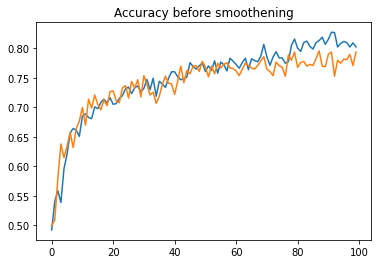

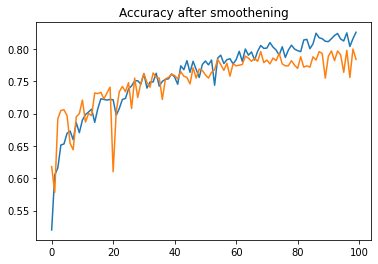

In [10]:
#plot the training and validation accuracy for the two models
#### model befoe label smoothening
plt.figure()
plt.plot(range(epochs), train_acc_nls, label='Training accuracy')
plt.plot(range(epochs), val_acc_nls, label='Validation accuracy')
plt.title('Accuracy before smoothening')
plt.show()

#### model after label_smoothening
plt.figure()
plt.plot(range(epochs), train_acc_ls, label='Training accuracy')
plt.plot(range(epochs), val_acc_ls, label='Validation accuracy')
plt.title('Accuracy after smoothening')
plt.show()

In [0]:
y_pred_nls=model_nls.predict(x_val, batch_size=10)
y_pred_ls=model_ls.predict(x_val, batch_size=10)

In [0]:
##Plot histogram of confidence to see how label smoothening avoids over confidence of models on wron predictions
def calchist(y_val_n,y_pred_n,x_val, lbl):
    true_cat=[]
    false_cat=[]
    true_dog=[]
    false_dog=[]
    
    
    y_pred=y_pred_n>0.5  #np.argmax(y_pred_n, axis=1)
    y_val=y_val_n>0.5 #np.argmax(y_val_n, axis=1)
    
    true_dog_images=[]
    true_cat_images=[]
    false_cat_images=[]
    false_dog_images=[]

    for i in range(len(y_val)):
        if (y_pred[i]==1 and y_val[i]==1):
            true_dog.append(np.max(y_pred_n[i]))
            true_dog_images.append(x_val[i])        
        elif (y_pred[i]==1 and y_val[i]==0): 
            false_cat.append(np.max(y_pred_n[i]))
            false_cat_images.append(x_val[i])        
        elif (y_pred[i]==0 and y_val[i]==0):
            true_cat.append(np.min(y_pred_n[i]))
            true_cat_images.append(x_val[i])        
        else:
            false_dog.append(np.min(y_pred_n[i]))
            false_dog_images.append(x_val[i])
   ### plot histogram
        
    hist,bin_edges=np.histogram(true_dog)
    plt.bar(bin_edges[:-1],hist, width=0.1)

    hist,bin_edges=np.histogram(false_cat)
    plt.bar(bin_edges[:-1],hist, width=0.1, alpha=0.5)
    plt.title('Histogram of True positive dogs and False negative cats '+lbl)
    plt.show()
    
        
    hist,bin_edges=np.histogram(true_cat)
    plt.bar(bin_edges[:-1],hist, width=0.1)
    
    hist,bin_edges=np.histogram(false_dog)
    plt.bar(bin_edges[:-1],hist, width=0.1, alpha=0.5)
    plt.title('Histogram of True positive cats and False negative dogs '+lbl)
    plt.show()

        

In [0]:
model_nls.save('dog_cat_classifier_nolbl_smoothening.h5')
model_ls.save('dog_cat_classifier_with_lbl_smoothening.h5')

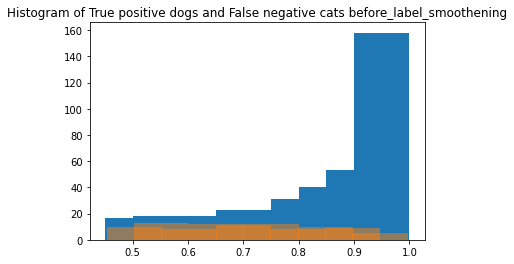

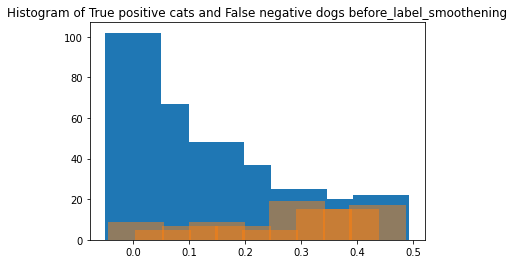

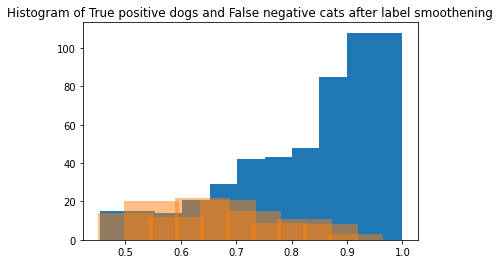

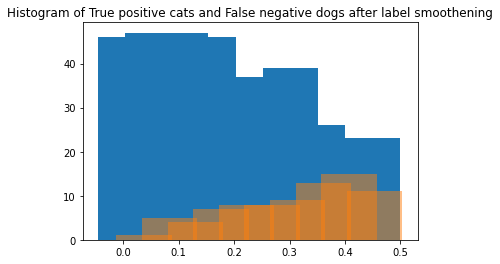

In [14]:
calchist(y_val,y_pred_nls,x_val, 'before_label_smoothening')

calchist(y_val,y_pred_ls,x_val, 'after label smoothening')   

In [15]:
## Confusion matrix and accuracy
con_mat = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_nls>0.5)
#with tf.Session():
#    print('Confusion Matrix before label smoothening: \n\n', tf.Tensor.eval(con_mat, feed_dict=None, session=None))
print('Confusion Matrix before label smoothening: \n', con_mat)
    
con_mat_ls = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_ls>0.5)
print('Confusion Matrix after label smoothening: \n ',con_mat_ls)
#with tf.Session():
 #   print('Confusion Matrix afterlabel smoothening: \n\n', tf.Tensor.eval(con_mat_ls, feed_dict=None, session=None))

Confusion Matrix before label smoothening: 
 tf.Tensor(
[[402  98]
 [108 392]], shape=(2, 2), dtype=int32)
Confusion Matrix after label smoothening: 
  tf.Tensor(
[[365 135]
 [ 81 419]], shape=(2, 2), dtype=int32)


In [16]:
### Now randomly flip some labels before training and see how label smoothening helps


model_nls_alr=ModelS()
model_nls_alr.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) 

model_ls_alr=ModelS()
model_ls_alr.compile(optimizer='adam',loss=label_smoothening, metrics=['accuracy']) 

for e in range(epochs):
    print('Epoch Number',e)   
    for itererations in range(total_train//batchsize):
        x_batch,y_batch=next(train_data_gen)  
       #flip_selector=np.random.binomial(1, 0.1, size=len(y_batch))==1
        y_batch[1:10]=0 #np.abs(1-y_batch[flip_selector])
        model_nls_alr.train_on_batch(x_batch,y_batch)
        model_ls_alr.train_on_batch(x_batch,y_batch)

        


Epoch Number 0
Epoch Number 1
Epoch Number 2
Epoch Number 3
Epoch Number 4
Epoch Number 5
Epoch Number 6
Epoch Number 7
Epoch Number 8
Epoch Number 9
Epoch Number 10
Epoch Number 11
Epoch Number 12
Epoch Number 13
Epoch Number 14
Epoch Number 15
Epoch Number 16
Epoch Number 17
Epoch Number 18
Epoch Number 19
Epoch Number 20
Epoch Number 21
Epoch Number 22
Epoch Number 23
Epoch Number 24
Epoch Number 25
Epoch Number 26
Epoch Number 27
Epoch Number 28
Epoch Number 29
Epoch Number 30
Epoch Number 31
Epoch Number 32
Epoch Number 33
Epoch Number 34
Epoch Number 35
Epoch Number 36
Epoch Number 37
Epoch Number 38
Epoch Number 39
Epoch Number 40
Epoch Number 41
Epoch Number 42
Epoch Number 43
Epoch Number 44
Epoch Number 45
Epoch Number 46
Epoch Number 47
Epoch Number 48
Epoch Number 49
Epoch Number 50
Epoch Number 51
Epoch Number 52
Epoch Number 53
Epoch Number 54
Epoch Number 55
Epoch Number 56
Epoch Number 57
Epoch Number 58
Epoch Number 59
Epoch Number 60
Epoch Number 61
Epoch Number 62
Ep

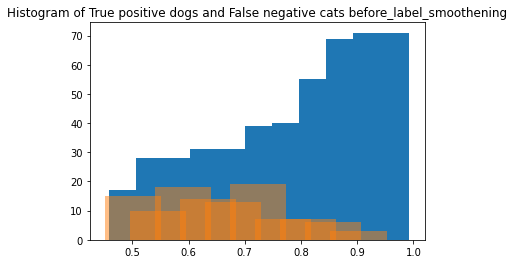

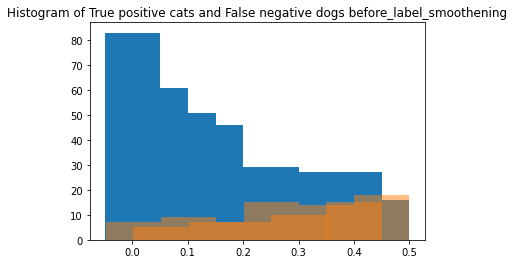

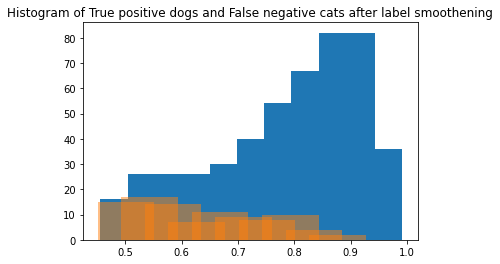

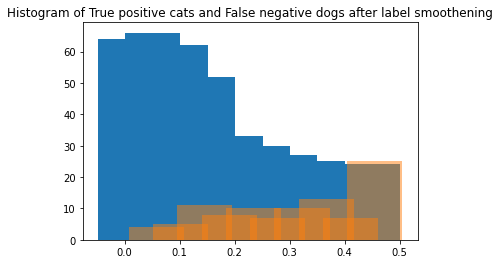

In [17]:
y_pred_nls_alr=model_nls_alr.predict(x_val,batch_size=10)
calchist(y_val,y_pred_nls_alr,x_val, 'before_label_smoothening')
y_pred_ls_alr=model_ls_alr.predict(x_val,batch_size=10)
calchist(y_val,y_pred_ls_alr,x_val, 'after label smoothening')  

In [18]:
## Confusion matrix and accuracy
con_mat = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_nls_alr>0.5)
print('Confusion Matrix before label smoothening: \n', con_mat)
#with tf.Session():
#    print('Confusion Matrix before label smoothening: \n\n', tf.Tensor.eval(con_mat, feed_dict=None, session=None))

    
con_mat_ls = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_ls_alr>0.5)
print('Confusion Matrix after label smoothening: \n', con_mat_ls)
#with tf.Session():
#    print('Confusion Matrix afterlabel smoothening: \n\n', tf.Tensor.eval(con_mat_ls, feed_dict=None, session=None))

Confusion Matrix before label smoothening: 
 tf.Tensor(
[[388 112]
 [107 393]], shape=(2, 2), dtype=int32)
Confusion Matrix after label smoothening: 
 tf.Tensor(
[[403  97]
 [100 400]], shape=(2, 2), dtype=int32)


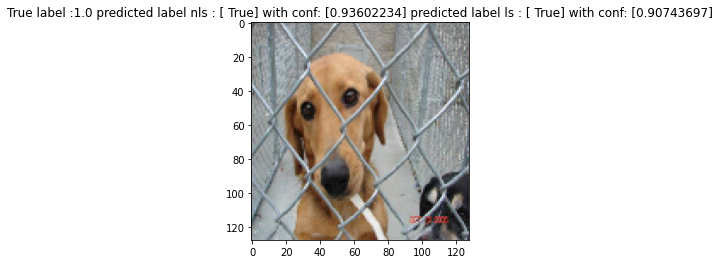

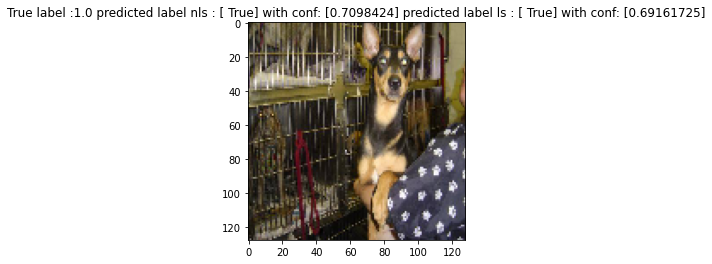

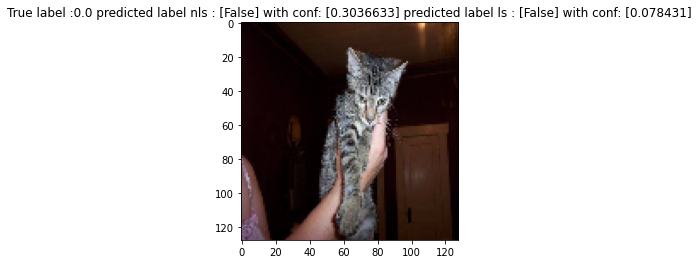

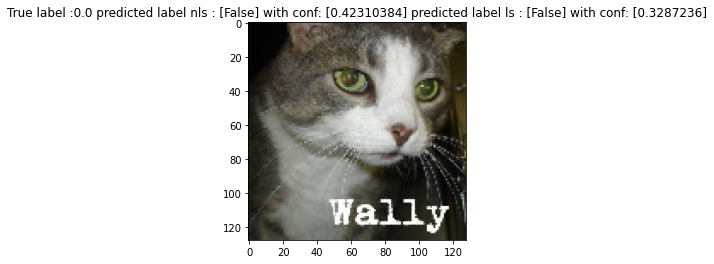

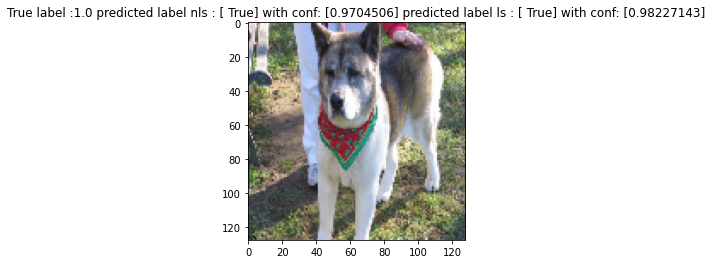

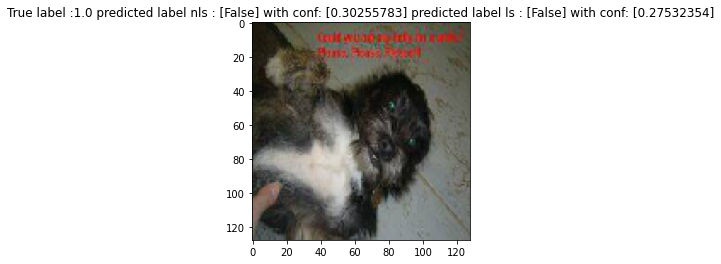

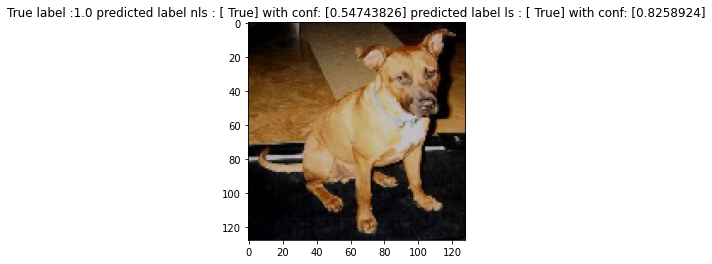

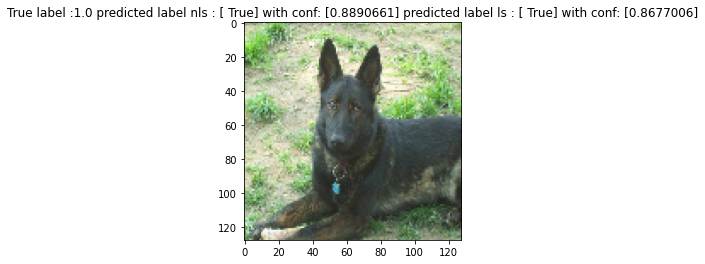

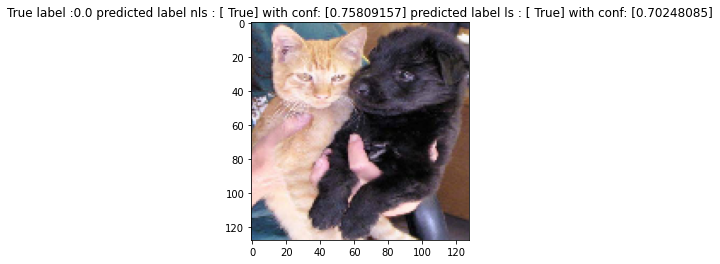

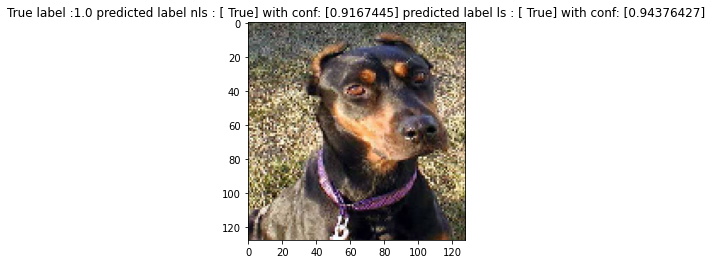

In [19]:
y_val_nls=y_pred_nls_alr>0.5
y_val_ls=y_pred_ls_alr>0.5
for i in range(10):
        plt.imshow(x_val[i])
        plt.title('True label :' + str(y_val[i])+  ' predicted label nls : ' + str(y_val_nls[i]) +' with conf: '+ str(y_pred_nls_alr[i])+ ' predicted label ls : ' + str(y_val_ls[i]) +' with conf: '+ str(y_pred_ls_alr[i]))
        plt.show()